<a href="https://colab.research.google.com/github/jeevanshrestha/Machine-Learning/blob/main/Gradient_Descent_MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
X,y = load_diabetes(return_X_y=True)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
class GradientDescentMLR:
    def __init__(self, learning_rate=0.01, iterations=1000):

        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None  # To store coefficients
        self.bias = None     # To store bias term
        self.loss_history = []  # To store loss values per iteration

    def compute_loss(self, X, y):

        n = X.shape[0]
        y_pred = np.dot(X, self.weights) + self.bias
        loss = (1 / (2 * n)) * np.sum((y - y_pred) ** 2)
        return loss

    def fit(self, X, y):

        n_samples, n_features = X.shape

        # Initialize weights and bias to zeros
        self.weights = np.ones(n_features)
        self.bias = 0

        # Gradient descent iterations
        for i in range(self.iterations):
            # Predict the outputs
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = -(1 / n_samples) * np.dot(X.T, (y - y_pred))  # Gradient w.r.t weights
            db = -(1 / n_samples) * np.sum(y - y_pred)        # Gradient w.r.t bias

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Compute and store the loss
            loss = self.compute_loss(X, y)
            self.loss_history.append(loss)

            # Print loss for monitoring (optional)
            if i % 100 == 0:
                print(f"Iteration {i+1}/{self.iterations}, Loss: {loss:.4f}")

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def get_params(self):
        return self.weights, self.bias

    def get_loss_history(self):
        return self.loss_history
    def plot_loss(self):
        plt.plot(range(self.iterations), self.loss_history)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss during Training')
        plt.show()

In [5]:
# Initialize and train the model
model = GradientDescentMLR(learning_rate=0.01, iterations=1000)
model.fit(X_train, y_train)

# Predict new values
predictions = model.predict(X_test)
print("Predictions:", predictions)

# Output the learned weights and bias
weights, bias = model.get_params()
print("Weights:", weights)
print("Bias:", bias)

Iteration 1/1000, Loss: 14093.8688
Iteration 101/1000, Loss: 4467.6326
Iteration 201/1000, Loss: 3161.1027
Iteration 301/1000, Loss: 2969.4570
Iteration 401/1000, Loss: 2927.4402
Iteration 501/1000, Loss: 2905.7295
Iteration 601/1000, Loss: 2886.9948
Iteration 701/1000, Loss: 2868.9097
Iteration 801/1000, Loss: 2851.1583
Iteration 901/1000, Loss: 2833.6941
Predictions: [151.20316485 154.11029548 150.40890677 146.91814231 157.67041527
 156.95885047 145.75709111 146.75680934 144.7172267  153.5336306
 152.99551428 152.28518401 153.96790705 152.02752088 157.18622495
 145.85424323 152.55443976 148.32077772 150.09573718 149.97719717
 147.14401033 156.34202027 153.43066836 153.66796502 148.21003783
 156.80519335 154.10319275 149.7521626  142.92236719 159.79145293
 158.2688928  148.06331267 143.83372899 147.97864596 154.7904941
 152.23503511 152.62974213 155.30081057 147.37126168 157.84202576
 148.41116087 148.74419148 153.81602399 153.80951459 151.81775131
 150.22856943 152.89774777 160.74465

In [6]:
r2_score(y_test, predictions)

0.051367056941237665

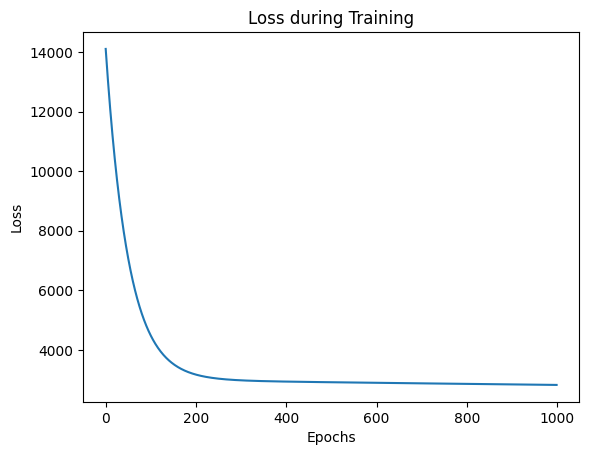

In [ ]:
model.plot_loss()